In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

# data preprocessing
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder, OneHotEncoder
from outlier_cleaner import OutlierCleaner
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer

# modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix,precision_score,roc_curve,roc_auc_score,r2_score,mean_squared_error
from sklearn.pipeline import Pipeline

import outlier_cleaner
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [212]:
df = pd.read_csv('./cleaned_movies.csv',index_col=0)

In [213]:
df.head()

,Title,Year,certificate,Time,genre,Rating,Synopsis,Content4,Content6,Votes,Gross,genre_list,certificate_cleaned
0,Avatar: The Way of Water,2022,12A,192,Action,7.8,\nJake Sully lives with his newfound family fo...,Sam Worthington,Zoe Saldana,280707,0,"['Action', 'Adventure', 'Fantasy']",OTHER
1,The Menu,2022,15,107,Horror,7.2,\nA young couple travels to a remote island to...,Ralph Fiennes,Anya Taylor-Joy,211749,0,"['Horror', 'Thriller']",OTHER
2,Babylon,2022,18,189,Comedy,7.5,\nA tale of outsized ambition and outrageous e...,Brad Pitt,Margot Robbie,47754,0,"['Comedy', 'Drama', 'History']",R
3,Everything Everywhere All at Once,2022,15,139,Action,8.0,\nA middle-aged Chinese immigrant is swept up ...,Daniel Scheinert,Michelle Yeoh,315971,0,"['Action', 'Adventure', 'Comedy']",OTHER
4,M3gan,2022,15,102,Horror,6.4,\nA robotics engineer at a toy company builds ...,Allison Williams,Violet McGraw,52436,0,"['Horror', 'Sci-Fi', 'Thriller']",OTHER


In [216]:
cleaner = OutlierCleaner(df)

In [218]:
df2,info = cleaner.clean_columns()

Cleaning columns: 100%|██████████| 4/4 [00:00<00:00, 49.10it/s]


In [219]:
df2.shape

(30120, 13)

In [221]:
cleaner.get_outlier_stats()

,Column,Method,Potential Outliers,Percent Outliers,Lower Bound,Upper Bound,Q1,Q3,IQR,Threshold,Mean,Std
0,Year,IQR,0,0.00,1940.500,2064.500,1987.0,2018.00,31.00,NaN,NaN,NaN
1,Year,Z-score,0,0.00,NaN,NaN,NaN,NaN,NaN,3.0,2001.082171,20.654468
2,Time,IQR,1221,4.05,63.000,135.000,90.0,108.00,18.00,NaN,NaN,NaN
3,Time,Z-score,269,0.89,NaN,NaN,NaN,NaN,NaN,3.0,100.227291,15.796972
4,Rating,IQR,530,1.76,2.950,8.950,5.2,6.70,1.50,NaN,NaN,NaN
5,Rating,Z-score,139,0.46,NaN,NaN,NaN,NaN,NaN,3.0,5.878789,1.188624
6,Votes,IQR,3038,10.09,-7357.375,14019.625,659.0,6003.25,5344.25,NaN,NaN,NaN
7,Votes,Z-score,863,2.87,NaN,NaN,NaN,NaN,NaN,3.0,4844.481042,6574.460959


{'Year': <Figure size 1500x500 with 3 Axes>,
 'Time': <Figure size 1500x500 with 3 Axes>,
 'Rating': <Figure size 1500x500 with 3 Axes>,
 'Votes': <Figure size 1500x500 with 3 Axes>}

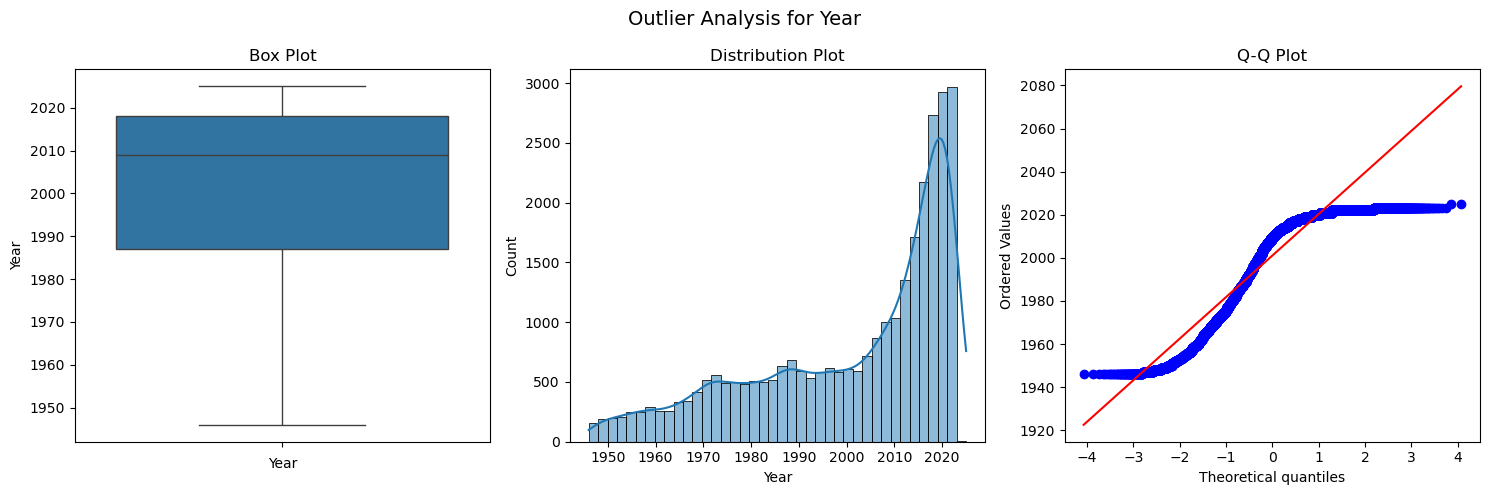

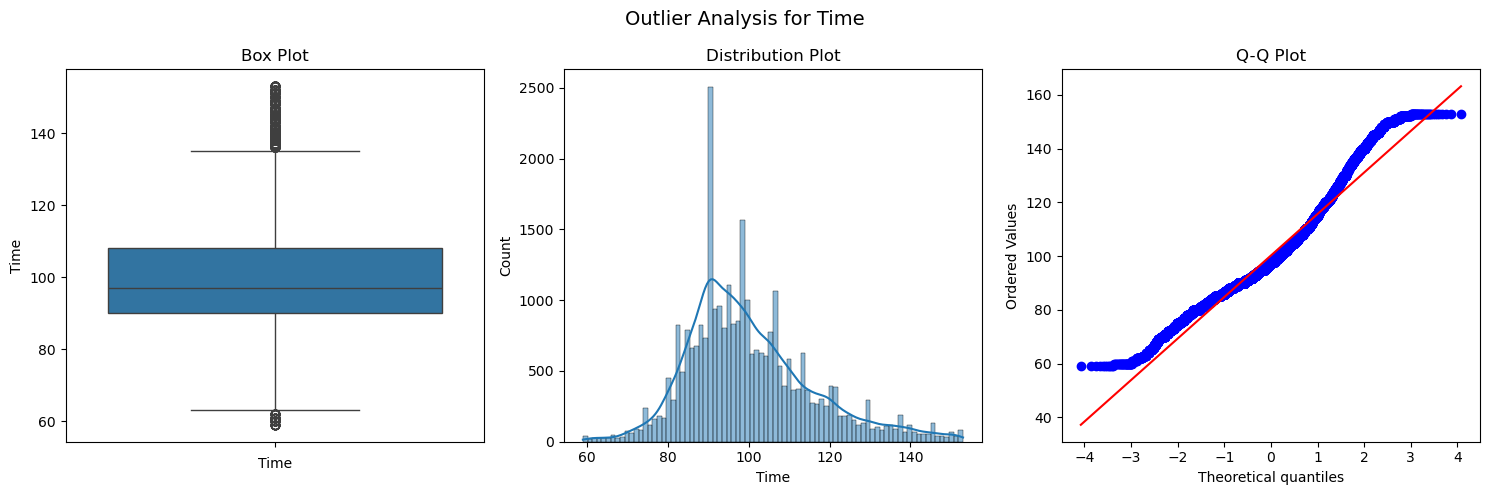

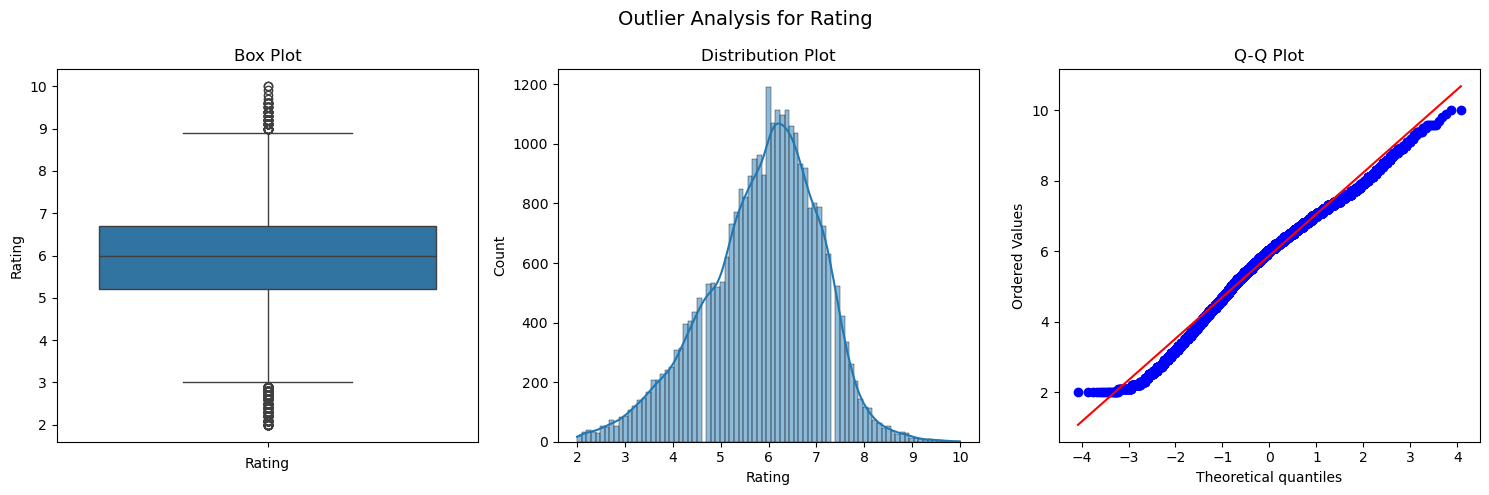

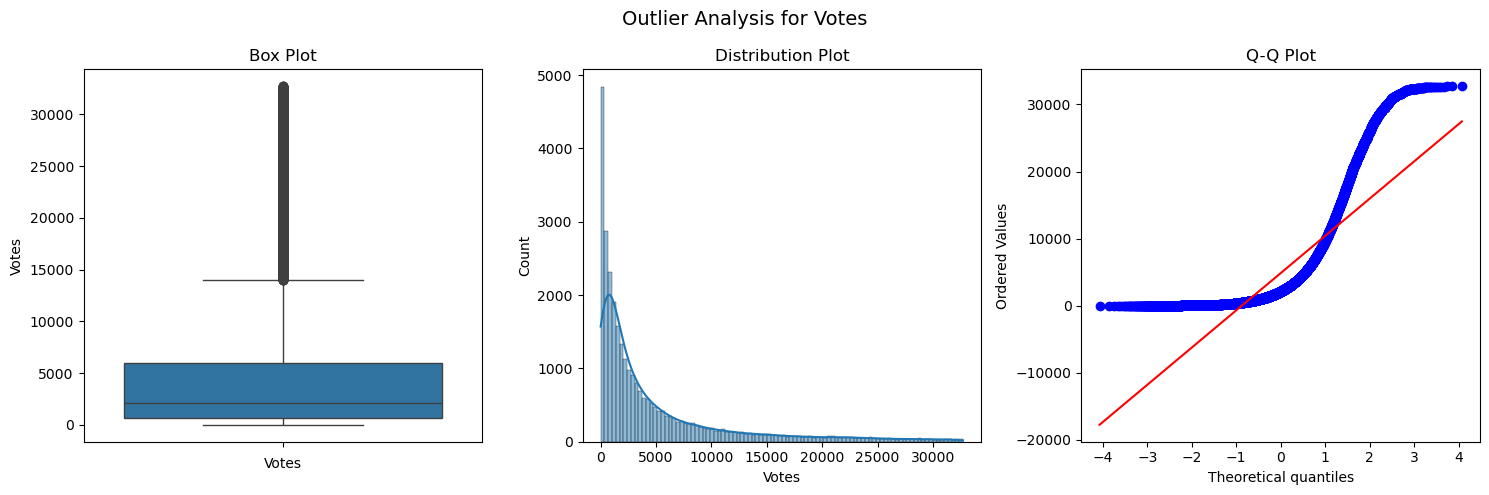

In [224]:
cleaner.plot_outlier_analysis()

## Encoding

In [226]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [316]:
x = df2.drop(columns='genre',axis=1)
y = df2['genre']

# x_train

In [318]:
# x

In [320]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [322]:
# transformer = ColumnTransformer(transformers=[
#     (StandardScaler(),['Year','Time','Rating','Votes']),
#     (LabelEncoder(),['Title', 'certificate', 'genre', 'Content4', 'Content6'])
# ])

In [324]:
# from sklearn.preprocessing import OneHotEncoder

# transformer = ColumnTransformer(transformers=[
#     ('num', StandardScaler(), ['Year', 'Time', 'Rating', 'Votes']),
#     ('cat', OneHotEncoder(handle_unknown='ignore'), ['Title', 'certificate', 'genre_list', 'Content4', 'Content6'])
# ])

In [330]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

transformer = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Year', 'Time', 'Rating', 'Votes']),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
     ['Title', 'certificate', 'genre_list', 'Content4', 'Content6'])
])


In [332]:
print(X_train.columns.tolist())

['Title', 'Year', 'certificate', 'Time', 'Rating', 'Synopsis', 'Content4', 'Content6', 'Votes', 'Gross', 'genre_list', 'certificate_cleaned']


In [334]:
transformer

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Year', 'Time', 'Rating', 'Votes']),
                                ('cat',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['Title', 'certificate', 'genre_list',
                                  'Content4', 'Content6'])])

In [336]:
# models = {
#     'Ridge Classifier': RidgeClassifier(),
#     'Support Vector Classifier': SVC(),
#     'Decision Tree Classifier': DecisionTreeClassifier(),
#     'KNN Classifier': KNeighborsClassifier(),
#     'Random Forest Classifier': RandomForestClassifier(),
#     'AdaBoost Classifier': AdaBoostClassifier(),
#     'Gradient Boosting Classifier': GradientBoostingClassifier(),
#     'XGBoost Classifier': XGBClassifier(),
#     'CatBoost Classifier': CatBoostClassifier(verbose=0),  # Set verbose=0 to suppress output
#     'LightGBM Classifier': LGBMClassifier()
# }

In [338]:
pipeline = Pipeline([
     ('transformer',transformer),
     ('XGB',XGBClassifier()),
])

In [340]:
le = LabelEncoder()

# Encode training labels
y_train_encoded = le.fit_transform(y_train)

# Encode test labels (if applicable)
y_test_encoded = le.transform(y_test)

In [342]:
print(y_train_encoded.tolist())

[7, 5, 0, 7, 12, 7, 7, 7, 5, 21, 3, 13, 3, 6, 12, 6, 5, 2, 7, 7, 2, 12, 6, 18, 7, 5, 9, 7, 5, 0, 15, 7, 5, 0, 7, 2, 5, 5, 7, 7, 5, 7, 0, 4, 12, 12, 7, 7, 7, 5, 6, 7, 6, 5, 7, 7, 12, 5, 6, 3, 7, 12, 7, 5, 7, 7, 0, 12, 7, 7, 6, 5, 7, 7, 5, 6, 2, 0, 7, 7, 7, 7, 6, 0, 7, 2, 5, 5, 7, 0, 7, 0, 2, 5, 12, 5, 7, 21, 0, 7, 0, 3, 12, 5, 7, 5, 0, 6, 5, 24, 12, 5, 6, 7, 0, 0, 5, 5, 4, 3, 6, 0, 12, 5, 7, 6, 0, 5, 4, 5, 3, 7, 7, 0, 2, 0, 4, 7, 5, 7, 0, 7, 4, 12, 7, 3, 3, 22, 12, 6, 0, 6, 5, 12, 5, 4, 18, 0, 9, 9, 0, 0, 7, 12, 7, 5, 5, 12, 12, 2, 6, 7, 3, 5, 5, 3, 5, 5, 0, 7, 5, 5, 7, 5, 5, 5, 2, 5, 12, 0, 0, 7, 0, 5, 5, 0, 21, 4, 5, 7, 7, 7, 5, 2, 7, 6, 7, 7, 5, 7, 0, 7, 5, 4, 7, 7, 6, 0, 0, 5, 3, 2, 5, 7, 7, 6, 7, 3, 2, 7, 12, 2, 7, 7, 6, 7, 2, 6, 5, 7, 0, 3, 3, 7, 2, 7, 12, 7, 2, 5, 6, 5, 5, 0, 0, 7, 12, 5, 12, 3, 21, 6, 12, 5, 5, 7, 5, 6, 5, 5, 7, 7, 7, 6, 7, 5, 7, 5, 21, 5, 5, 12, 5, 6, 7, 0, 0, 0, 0, 2, 5, 0, 5, 7, 12, 7, 5, 7, 7, 7, 7, 0, 2, 22, 3, 7, 12, 7, 7, 7, 7, 7, 12, 2, 2, 4, 21, 0, 12, 

In [344]:
pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Time', 'Rating',
                                                   'Votes']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Title', 'certificate',
                                                   'genre_list', 'Content4',
                                                   'Content6'])])),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, col...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

## Model

In [349]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Year', 'Time', 'Rating', 'Votes']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Title', 'certificate', 'genre_list', 'Content4', 'Content6'])
])

models = {
    'Ridge Classifier': RidgeClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'KNN Classifier': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'XGBoost Classifier': XGBClassifier(),
    'CatBoost Classifier': CatBoostClassifier(verbose=0),  # Set verbose=0 to suppress output
    'LightGBM Classifier': LGBMClassifier()
}

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


results = []
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train_enc)
    y_pred = pipeline.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test_enc, y_pred),
        'F1 Score': f1_score(y_test_enc, y_pred, average='weighted')
    })

results_df = pd.DataFrame(results)
print(results_df)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 24096, number of used features: 224
[LightGBM] [Info] Start training from score -1.919050
[LightGBM] [Info] Start training from score -10.089801
[LightGBM] [Info] Start training from score -3.103235
[LightGBM] [Info] Start training from score -3.525946
[LightGBM] [Info] Start training from score -3.500875
[LightGBM] [Info] Start training from score -1.369830
[LightGBM] [Info] Start training from score -2.628736
[LightGBM] [Info] Start training from score -1.245609
[LightGBM] [Info] Start training from score -5.759068
[LightGBM] [Info] Start training from score -5.008397
[LightGBM] [Info] Start training from score -8.298042
[LightGBM] [Info] Start training from score -7.317212
[LightGBM] [Info] Start training from score -2.538614
[LightGB

In [300]:
df2.head(1)

,Title,Year,certificate,Time,genre,Rating,Synopsis,Content4,Content6,Votes,Gross,genre_list,certificate_cleaned
7,You People,2023,15,117,Comedy,5.6,"\nFollows a new couple and their families, who...",Jonah Hill,Lauren London,29414,0,"['Comedy', 'Romance']",OTHER


In [302]:
df2.iloc[1503]

Title                                                       Don't Listen
Year                                                                2020
certificate                                                           18
Time                                                                  97
genre                                                          Adventure
Rating                                                               6.1
Synopsis               \nDaniel and Sara have a 9-year-old son, Eric,...
Content4                                                  Rodolfo Sancho
Content6                                                   Ana Fernández
Votes                                                              14949
Gross                                                                  0
genre_list                              ['Adventure', 'Drama', 'Horror']
certificate_cleaned                                                    R
Name: 5517, dtype: object

In [304]:
min_year = df2['Time'].dropna().astype(int).min()
min_year

59

In [306]:
max_year = df2['Time'].dropna().astype(int).max()
max_year

153

In [308]:
df.columns

Index(['Title', 'Year', 'certificate', 'Time', 'genre', 'Rating', 'Synopsis',
       'Content4', 'Content6', 'Votes', 'Gross', 'genre_list',
       'certificate_cleaned'],
      dtype='object')

In [365]:
# Dummy model function
def recommend_movie(Title, Year, genre, Rating, Duration, Content4, Content6):
    genre_map = {
        'Action': 1, 'Adult': 2, 'Adventure': 3, 'Animation': 4, 'Biography': 5,
        'Comedy': 6, 'Crime': 7, 'Drama': 8, 'Family': 9, 'Fantasy': 10,
        'Film-Noir': 11, 'Game-Show': 12, 'History': 13, 'Horror': 14, 'Music': 15,
        'Musical': 16, 'Mystery': 17, 'News': 18, 'Reality-TV': 19, 'Romance': 20,
        'Sci-Fi': 21, 'Sport': 22, 'Thriller': 23, 'Unknown': 24, 'War': 25, 'Western': 26
    }

    Content4_map = {
        'Alexandra Daddario': 1, 'Alicia Vikander': 2, 'Alison Brie': 3, 'Amanda Seyfried': 4,
        'Amber Heard': 5, 'Anne Hathaway': 6, 'Anna Kendrick': 7, 'Anya Taylor-Joy': 8,
        'Aubrey Plaza': 9, 'Brie Larson': 10, 'Carey Mulligan': 11, 'Charlize Theron': 12,
        'Chloë Grace Moretz': 13, 'Dakota Fanning': 14, 'Dakota Johnson': 15,
        'Emma Roberts': 16, 'Emma Stone': 17, 'Emmy Rossum': 18, 'Eva Green': 19,
        'Felicity Jones': 20, 'Florence Pugh': 21, 'Gal Gadot': 22, 'Hailee Steinfeld': 23,
        'Jennifer Lawrence': 24, 'Jessica Chastain': 25, 'Kate Mara': 26, 'Keira Knightley': 27,
        'Kristen Stewart': 28, 'Léa Seydoux': 29, 'Lily Collins': 30, 'Margot Robbie': 31,
        'Mary Elizabeth Winstead': 32, 'Mia Wasikowska': 33, 'Natalie Dormer': 34,
        'Natalie Portman': 35, 'Rachel McAdams': 36, 'Rooney Mara': 37, 'Rosamund Pike': 38,
        'Saoirse Ronan': 39, 'Scarlett Johansson': 40, 'Shailene Woodley': 41,
        'Sophie Turner': 42, 'Tessa Thompson': 43, 'Vanessa Kirby': 44, 'Zoe Saldana': 45
    }

    Content6_map = {
        'Amitabh Bachchan': 1, 'Ananya Panday': 2, 'Anil Kapoor': 3, 'Arjun Kapoor': 4,
        'Ayushmann Khurrana': 5, 'Deepika Padukone': 6, 'Hrithik Roshan': 7,
        'Jacqueline Fernandez': 8, 'Kartik Aaryan': 9, 'Katrina Kaif': 10, 'Kiara Advani': 11,
        'Madhuri Dixit': 12, 'Priyanka Chopra': 13, 'Ranbir Kapoor': 14, 'Ranveer Singh': 15,
        'Rani Mukerji': 16, 'Saif Ali Khan': 17, 'Salman Khan': 18, 'Shah Rukh Khan': 19,
        'Shraddha Kapoor': 20, 'Sidharth Malhotra': 21, 'Sonakshi Sinha': 22,
        'Sonam Kapoor': 23, 'Sushant Singh Rajput': 24, 'Tiger Shroff': 25,
        'Varun Dhawan': 26, 'Vicky Kaushal': 27, 'Vidya Balan': 28
    }

    rating_map = {round(x * 0.1, 1): i+1 for i, x in enumerate(range(10, 101))}

    input_data = pd.DataFrame({
        'Year': [Year],
        'genre': [genre_map[genre]],
        'Rating': [rating_map[round(Rating, 1)]],
        'Duration': [Duration],
        'Content4': [Content4_map[Content4]],
        'Content6': [Content6_map[Content6]]
    })

    prediction = "Recommended" if Rating >= 6.5 else "Not Recommended"
    return prediction

# Gradio interface
with gr.Blocks(title='Movie Recommendation System') as demo:
    gr.Markdown("## Movie Recommendation System")

    with gr.Row():
        with gr.Column():
            Title = gr.Textbox(label="Movie Title")
            Year = gr.Slider(1946, 2025, step=1, label='Release Year')
            Genre = gr.Dropdown(list({
                'Action': 1, 'Adult': 2, 'Adventure': 3, 'Animation': 4, 'Biography': 5,
                'Comedy': 6, 'Crime': 7, 'Drama': 8, 'Family': 9, 'Fantasy': 10,
                'Film-Noir': 11, 'Game-Show': 12, 'History': 13, 'Horror': 14, 'Music': 15,
                'Musical': 16, 'Mystery': 17, 'News': 18, 'Reality-TV': 19, 'Romance': 20,
                'Sci-Fi': 21, 'Sport': 22, 'Thriller': 23, 'Unknown': 24, 'War': 25, 'Western': 26
            }.keys()), label='Genre')
            Rating = gr.Slider(1.0, 10.0, step=0.1, label='Rating')
            Duration = gr.Slider(50, 200, step=1, label='Duration (minutes)')
            Content4 = gr.Dropdown(list({'Alexandra Daddario': 1, 'Alicia Vikander': 2, 'Alison Brie': 3, 'Amanda Seyfried': 4,
                'Amber Heard': 5, 'Anne Hathaway': 6, 'Anna Kendrick': 7, 'Anya Taylor-Joy': 8,
                'Aubrey Plaza': 9, 'Brie Larson': 10, 'Carey Mulligan': 11, 'Charlize Theron': 12,
                'Chloë Grace Moretz': 13, 'Dakota Fanning': 14, 'Dakota Johnson': 15,
                'Emma Roberts': 16, 'Emma Stone': 17, 'Emmy Rossum': 18, 'Eva Green': 19,
                'Felicity Jones': 20, 'Florence Pugh': 21, 'Gal Gadot': 22, 'Hailee Steinfeld': 23,
                'Jennifer Lawrence': 24, 'Jessica Chastain': 25, 'Kate Mara': 26, 'Keira Knightley': 27,
                'Kristen Stewart': 28, 'Léa Seydoux': 29, 'Lily Collins': 30, 'Margot Robbie': 31,
                'Mary Elizabeth Winstead': 32, 'Mia Wasikowska': 33, 'Natalie Dormer': 34,
                'Natalie Portman': 35, 'Rachel McAdams': 36, 'Rooney Mara': 37, 'Rosamund Pike': 38,
                'Saoirse Ronan': 39, 'Scarlett Johansson': 40, 'Shailene Woodley': 41,
                'Sophie Turner': 42, 'Tessa Thompson': 43, 'Vanessa Kirby': 44, 'Zoe Saldana': 45
            }.keys()), label='Female Lead')
            Content6 = gr.Dropdown(list( {
                'Amitabh Bachchan': 1, 'Ananya Panday': 2, 'Anil Kapoor': 3, 'Arjun Kapoor': 4,
                'Ayushmann Khurrana': 5, 'Deepika Padukone': 6, 'Hrithik Roshan': 7,
                'Jacqueline Fernandez': 8, 'Kartik Aaryan': 9, 'Katrina Kaif': 10, 'Kiara Advani': 11,
                'Madhuri Dixit': 12, 'Priyanka Chopra': 13, 'Ranbir Kapoor': 14, 'Ranveer Singh': 15,
                'Rani Mukerji': 16, 'Saif Ali Khan': 17, 'Salman Khan': 18, 'Shah Rukh Khan': 19,
                'Shraddha Kapoor': 20, 'Sidharth Malhotra': 21, 'Sonakshi Sinha': 22,
                'Sonam Kapoor': 23, 'Sushant Singh Rajput': 24, 'Tiger Shroff': 25,
                'Varun Dhawan': 26, 'Vicky Kaushal': 27, 'Vidya Balan': 28
            }.keys()), label='Male Lead')
            predict_button = gr.Button('Recommend')
            prediction_output = gr.Textbox(label='Recommendation')

        predict_button.click(
            fn=recommend_movie,
            inputs=[Title, Year, Genre, Rating, Duration, Content4, Content6],
            outputs=prediction_output
        )

if __name__ == '__main__':
    demo.launch()

* Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


In [ ]:
def predict_rentals(year,genre,Time,Rating,Content4,Content6):

    year_map = {'Spring':1,'Summer':2,'Autumm':3, 'Winter':3}
    weather_map = {'Clear':1,'Mist/Cloudy':2,'Light Snow/Rain':3,'Heavy Weather':4}
    weekday_map ={'Sunday':0, 'Monday':1,'Tuesday':2, 'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    working_map = {'Work':1, 'No Work':0}
    holiday_map = {'Holiday':1, 'No Holiday':0}
    

    input_data = pd.DataFrame({
        'season':[season_map[season]],
        # 'year':yr,
        'holiday':[holiday_map[holiday]],
        'weekday':[weekday_map[weekday]],
        'working_day': [working_map[workingday]],
        'weather': [weather_map[weathersit]],
        'temperature':temperature,
        # 'actual temperature':atemp,
        'humidity':humidity,
        'windspeed':windspeed,
        'casual':casual,
        # 'registered':registered,
        'year':year,
        'month':[month_map[month]],
        'day':day,
    })
    prediction = model.predict(input_data[0])
    return f"{int(prediction):}bikes"

with gr.Blocks(title='London Bike Rental Prediction Demo') as demo:
    gr.Markdown('Bike Rental prediction')

    with gr.Row():
        with gr.Column():
            temperature = gr.Slider(0.0, 100, step=0.5, label='Temperature')
            humidity = gr.Slider(0.0, 1.0, step=0.05, label='Humidity')
            windspeed = gr.Slider(0.0, 1.0, step=0.05, label='Wind Speed')
            casual = gr.Slider(0, 40000, step=0.05, label='Casual Users')
            day = gr.Slider(0, 31, step=1, label='Date')

            season = gr.Radio(
                choices = ['Spring', 'Summer', 'Autumm', 'Winter'],
                label = 'Season',
            )
            weathersit = gr.Radio(
                choices = ['Clear','Mist/Cloudy','Light Snow/Rain','Heavy Weather'],
                label = 'Weather',
            )
            year = gr.Radio(
                choices = [2011, 2012],
                label = 'Year',
            )
            weekday = gr.Radio(
                choices = ['Sunday', 'Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday'],
                label = 'Day',
            )
            month = gr.Radio(
                choices = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                label = 'Month',
            )
            workingday = gr.Radio(
                choices = ['Work', 'No Work'],
                label='Working Day'
            )
            holiday = gr.Radio(
                choices = ['Holiday', 'No Holiday'],
                label='Holiday'
            )

            predict_button = gr.Button('Predict Rental')
            prediction_output = gr.Textbox(label='Prediction Rental Count', value='Click predict to see the result')
        predict_button.click(
            fn = predict_rentals, 
            inputs = [season, holiday, weekday, workingday, weathersit, temperature, humidity, windspeed, casual, year, month, day],
            outputs = prediction_output
        )

if __name__ == '__main__':
    demo.launch()